In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
import regex as re
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import wordcloud
import warnings
import matplotlib.cm as cm
from matplotlib import rcParams
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('../data_csv/retail.csv')

In [3]:
df = df[['title', 'selftext', 'subreddit']]

In [4]:
df["title"]= df["title"].str.replace("just", " ")
df["selftext"]= df["selftext"].str.replace("just", " ")
df["title"]= df["title"].str.replace("amp", " ")
df["selftext"]= df["selftext"].str.replace("amp", " ")

In [5]:
df.replace('\'','', regex=True, inplace=True) 
df = df.replace("[^a-zA-Z]", " ", regex=True)

In [6]:
df.head(3)

,title,selftext,subreddit
0,Dont want to use the right door then no you c...,removed,TalesFromRetail
1,Let me go out of the wrong door,At work today I was on the door making su...,TalesFromRetail
2,Retail rite of passage,removed,TalesFromRetail


In [7]:
df.dropna(inplace=True)

In [8]:
df = df[~df.selftext.str.contains("deleted")]
df = df[~df.selftext.str.contains("removed")]

In [9]:
df.head()

,title,selftext,subreddit
1,Let me go out of the wrong door,At work today I was on the door making su...,TalesFromRetail
3,A wholesome confused customer,This story is from when I worked at a grocery ...,TalesFromRetail
4,Customer storms out after I was trying to get ...,So I work at a DIY store and it was a busy Sat...,TalesFromRetail
6,Insta do it for me,Okay so my store maybe all stores a supermar...,TalesFromRetail
7,A beautiful convergence of annoyance,I used to work at a grocery store that often h...,TalesFromRetail


In [10]:
cv = CountVectorizer(stop_words = 'english', min_df = 5)

X_cv = cv.fit_transform(df['selftext'])

X_cv

<1933x4897 sparse matrix of type '<class 'numpy.int64'>'
	with 205032 stored elements in Compressed Sparse Row format>

In [11]:
df_features = pd.DataFrame(data = X_cv.todense(),
                          columns = cv.get_feature_names())
df_features.head()

,aback,abandoned,ability,able,abruptly,absolute,absolutely,absurd,abuse,abusing,...,younger,youngest,youre,youtube,youve,yr,yup,zero,ziplock,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


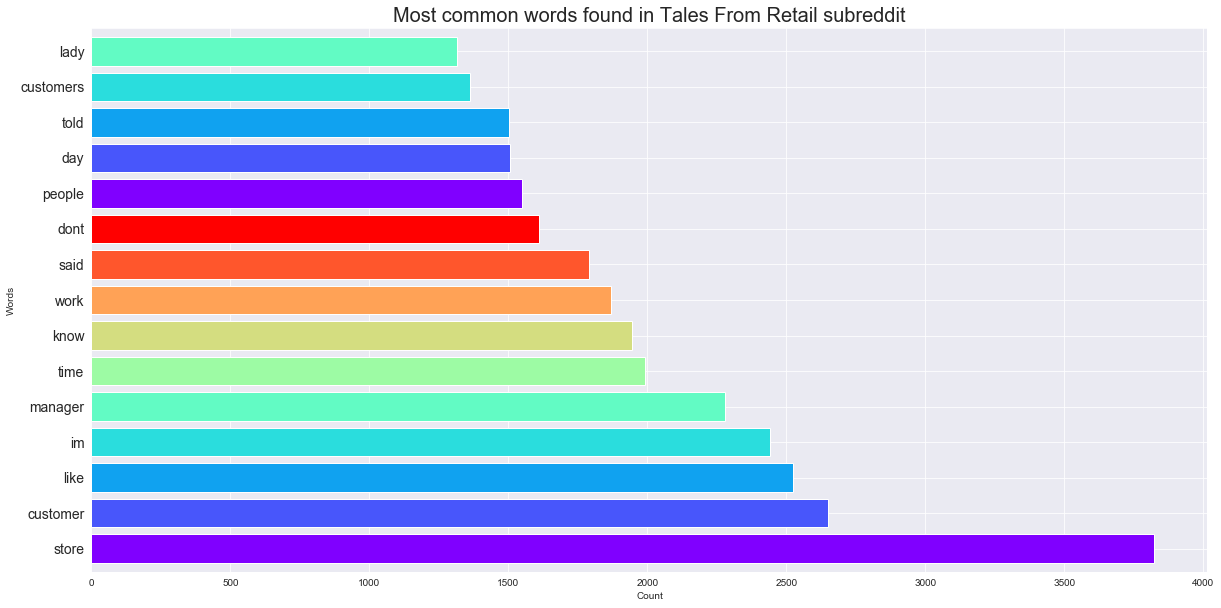

In [14]:
import matplotlib.cm as cm
from matplotlib import rcParams
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10
sns.set_style("darkgrid")
plt.title('Most common words found in Tales From Retail subreddit', fontsize=20)
plt.xlabel('Count')
plt.ylabel('Words')
plt.yticks(fontsize=14)
df_features.sum().sort_values(ascending = False).head(15).plot.barh(color=colors, width =.8)